## Wine Quality Classification
### What are the factors behind the high quality?
### Is there a relationship between alcohol content and quality?

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 10

In [347]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [349]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [350]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [351]:
df = df.drop('Id', axis=1)

In [352]:
df = pd.DataFrame(df, columns=df.columns)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


## quality
### 5 is the most common, followed by 6.Overall quality is mostly in the middle, with few wines of quality 1 and 8.

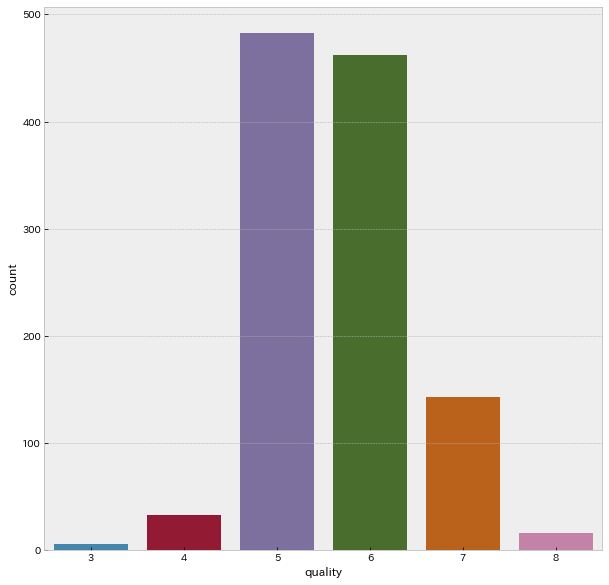

In [353]:
sns.countplot(df['quality'],label="Count")
plt.show()

In [354]:
print(df['quality'].value_counts())
print('--------------------------------')
print(df['quality'].value_counts(normalize=True))

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64
--------------------------------
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: quality, dtype: float64


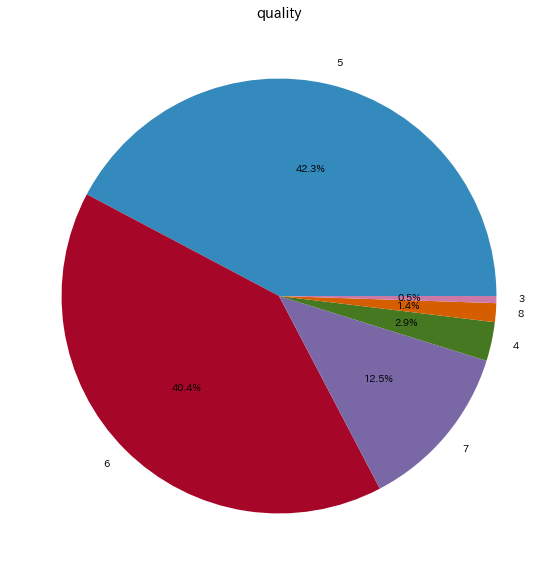

In [355]:
x = df['quality'].value_counts()

plt.title('quality')
plt.pie(x, labels=x.index, autopct='%.1f%%');

## alcohol
### The average is 10.4 and the highest is 14.9.


In [357]:
df['alcohol'].value_counts()

9.500000     92
9.400000     72
9.800000     57
9.200000     50
10.000000    49
             ..
11.950000     1
9.950000      1
9.233333      1
9.250000      1
10.550000     1
Name: alcohol, Length: 61, dtype: int64

In [358]:
df['alcohol'].describe()

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [359]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


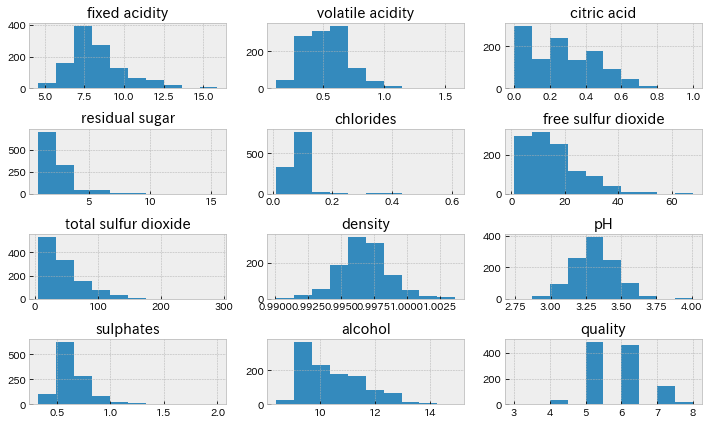

In [360]:
plt.rcParams['figure.figsize'] = 10, 6
df.hist();
plt.tight_layout(); 

### Rounded to the nearest degree of alcohol

In [361]:
df['alcohol'] = df['alcohol'].round()

In [362]:
pd.crosstab(df['quality'], df['alcohol'])

alcohol,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
quality,,,,,,,,
3,1,1,3,1,0,0,0,0
4,0,9,12,9,2,1,0,0
5,1,147,260,59,9,6,0,1
6,1,48,186,124,80,18,5,0
7,0,2,25,39,63,9,5,0
8,0,0,2,4,4,5,1,0


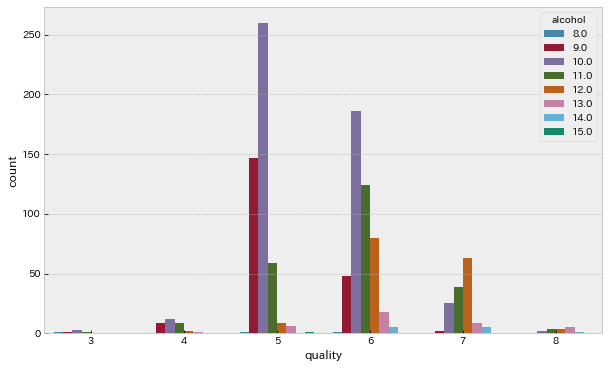

In [363]:
sns.countplot(x='quality', hue='alcohol', data=df);

### The highest number of alcoholic beverages are those with a quality of 7 or higher, and the highest number of alcoholic beverages are those with a quality of 12 or 13.

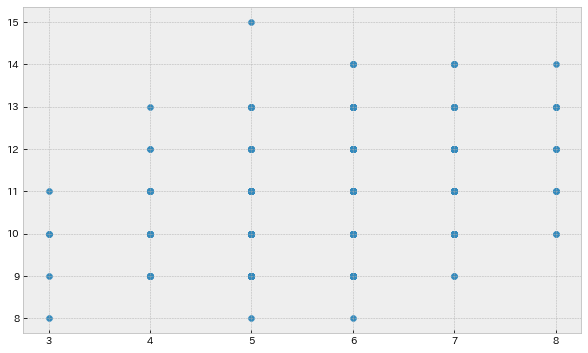

In [364]:
plt.scatter(df['quality'], df['alcohol'])

In [365]:
df[['quality', 'alcohol']].corr()

,quality,alcohol
quality,1.000000,0.474485
alcohol,0.474485,1.000000


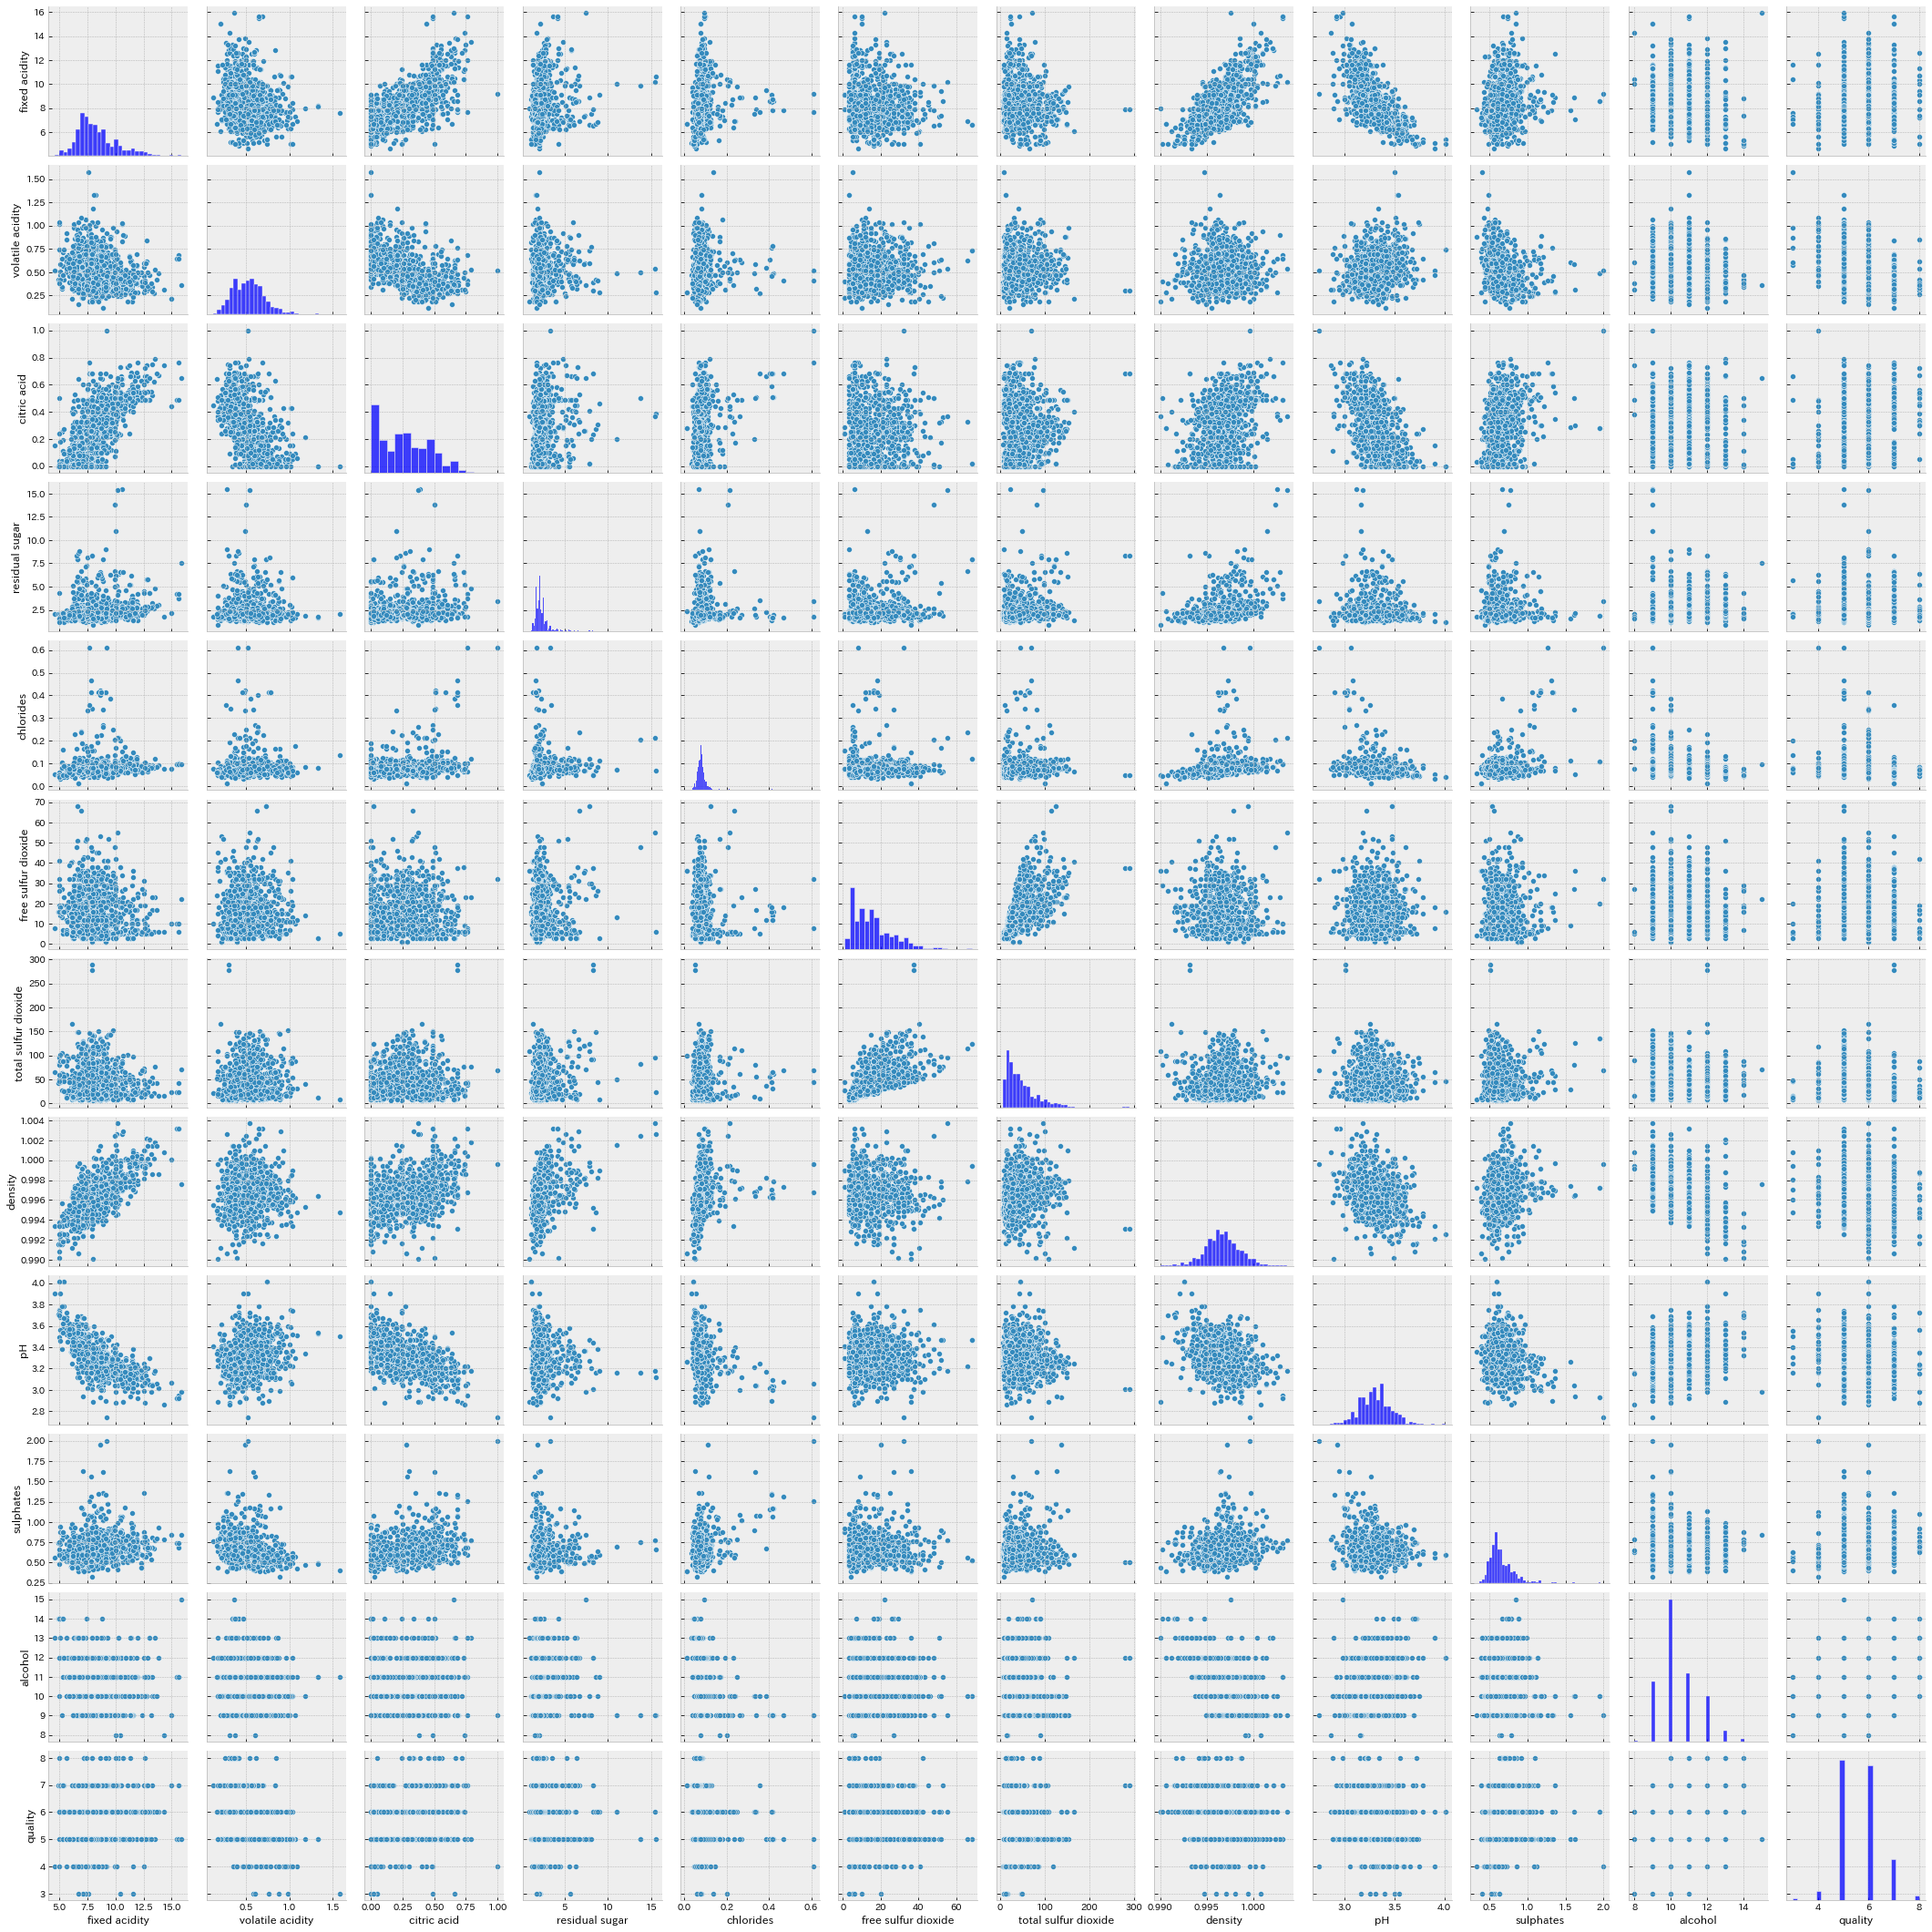

In [366]:
sns.pairplot(df);

In [367]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.077810,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.183877,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.079472,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.044319,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.232361,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.045328,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.186850,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.478480,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.227684,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.081123,0.257710


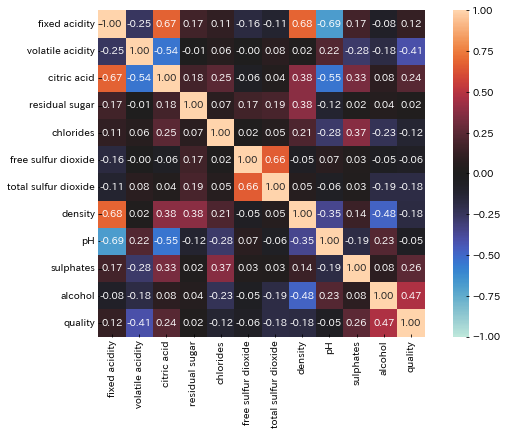

In [368]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

### It seems that there is no correlation between alcohol and quality.

## Clustering

In [369]:
x = df.drop(['quality'], axis=1)
y = df['quality']

In [370]:
# type(x)
x_num = x.values
x_num

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 , 10.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 , 10.   ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.   ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.   ]])

In [371]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_num)
cluster = kmeans.labels_
print(cluster)

[2 0 0 ... 0 0 0]


In [372]:
x['cluster'] = cluster
x.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,10.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,10.0,0


In [373]:
groups = x.groupby('cluster')
groups.size()

cluster
0    400
1    163
2    580
dtype: int64

In [374]:
groups.agg(['min', 'max', 'mean', 'median'])

fixed acidity                        volatile acidity                  \
                  min   max      mean median              min   max      mean   
cluster                                                                         
0                 4.6  15.9  8.249500    7.9             0.16  1.18  0.530000   
1                 5.0  11.6  7.892025    7.8             0.18  1.07  0.576442   
2                 5.2  15.6  8.471379    8.0             0.12  1.58  0.519586   

               citric acid        ...        pH        sulphates        \
        median         min   max  ...      mean median       min   max   
cluster                           ...                                    
0        0.525         0.0  1.00  ...  3.320725   3.33      0.40  2.00   
1        0.590         0.0  0.68  ...  3.292577   3.27      0.39  1.95   
2        0.505         0.0  0.76  ...  3.309500   3.31      0.33  1.56   

                         alcohol                          
             mean median     min   max       mean median  
cluster                                                   
0        0.675475   0.64     9.0  15.0  10.395000   10.0  
1        0.646258   0.58     8.0  14.0  10.012270   10.0  
2        0.648672   0.62     8.0  14.0  10.594828   10.0  

[3 rows x 44 columns]

In [375]:
mean = groups.mean()
mean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
cluster,,,,,,,,,,,
0,8.249500,0.530000,0.266025,2.492125,0.091190,21.235000,54.826250,0.996800,3.320725,0.675475,10.395000
1,7.892025,0.576442,0.271963,3.130675,0.088110,25.886503,108.944785,0.996914,3.292577,0.646258,10.012270
2,8.471379,0.519586,0.268966,2.391552,0.083666,8.853448,22.055172,0.996631,3.309500,0.648672,10.594828


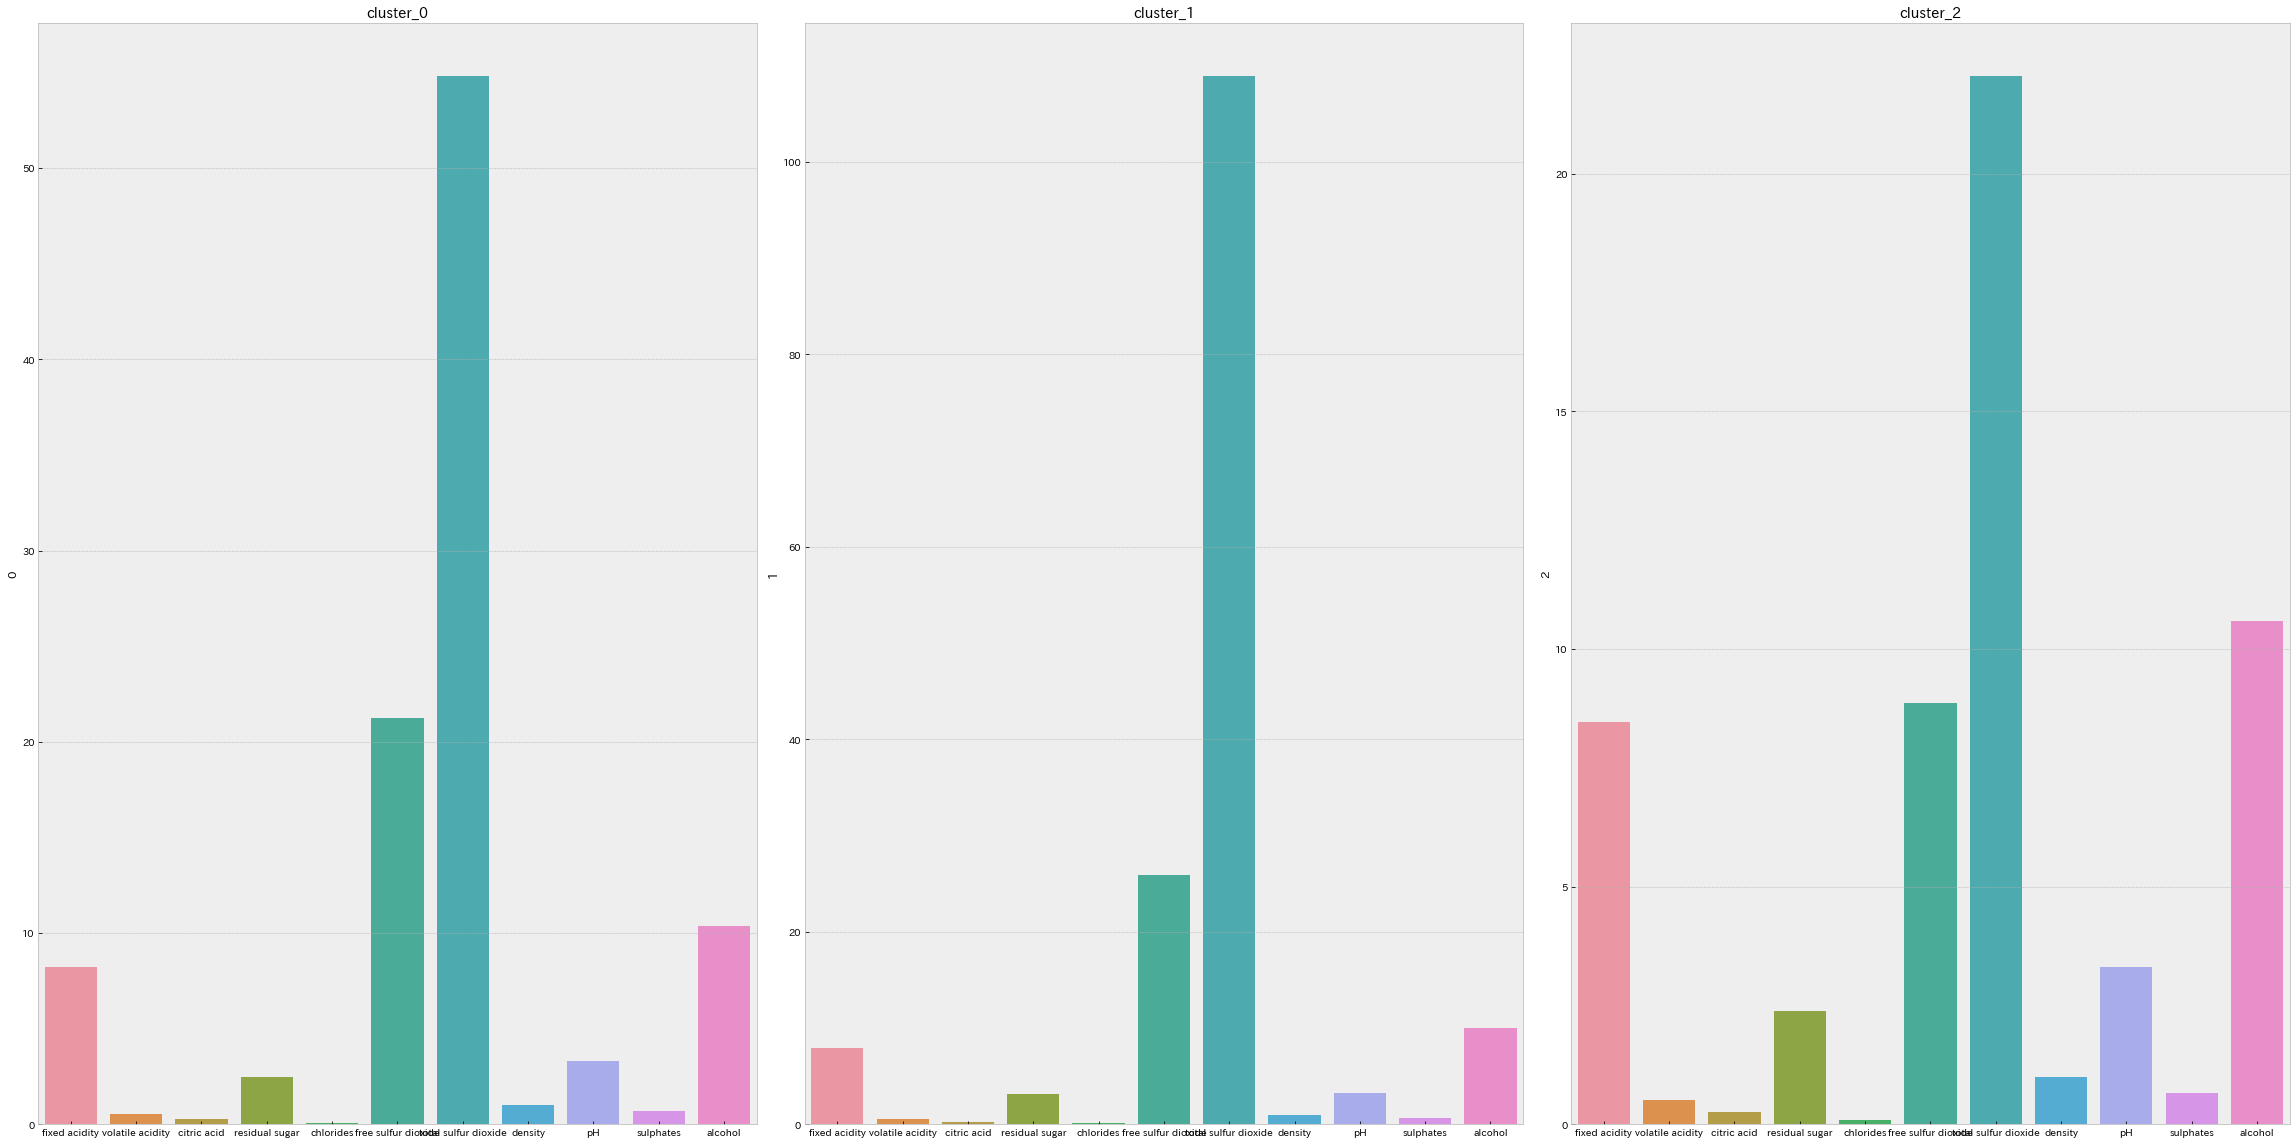

In [376]:
plt.figure(figsize=(32, 16))

num = kmeans.n_clusters

for n in range(num):
    plt.subplot(1, num, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.tight_layout()

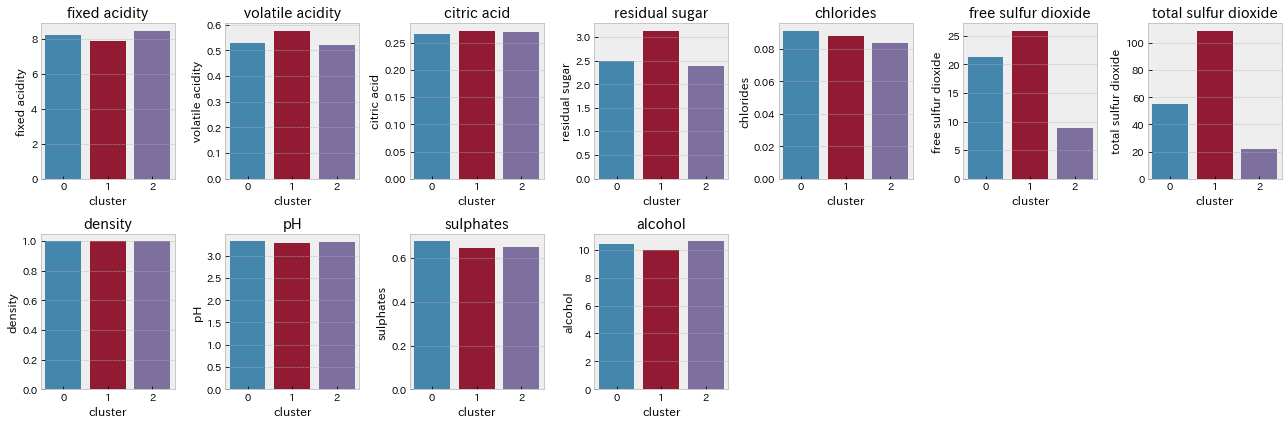

In [377]:
plt.figure(figsize=(18, 6))

for n, col in enumerate(mean.columns):
    plt.subplot(2, 7, n+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

# Model
## DecisionTreeClassifier

In [378]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [379]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((800, 12), (343, 12), (800,), (343,))

In [380]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, t_train)
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  1.0
test score :  0.5422740524781341


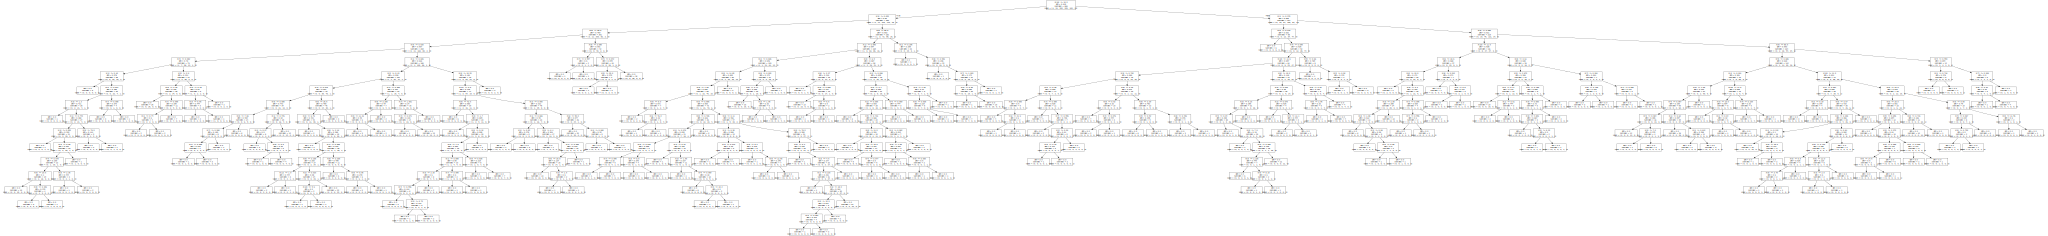

In [381]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree)
graph_tree = graphviz.Source(dot_data)
graph_tree

## feature importance

In [382]:
feature_importance = dtree.feature_importances_
feature_importance

array([0.08084301, 0.12400971, 0.05880926, 0.08724423, 0.10908927,
       0.04554338, 0.08701118, 0.06124147, 0.09185717, 0.1334796 ,
       0.11352981, 0.00734192])

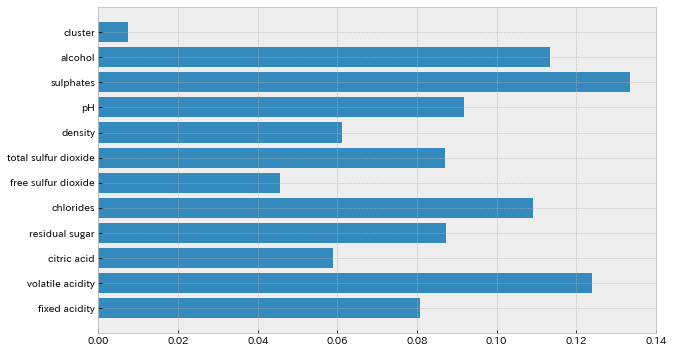

In [394]:
y = x.columns
width = feature_importance
plt.barh(y=y, width=width);